In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write

### Project 3  task 1

16000


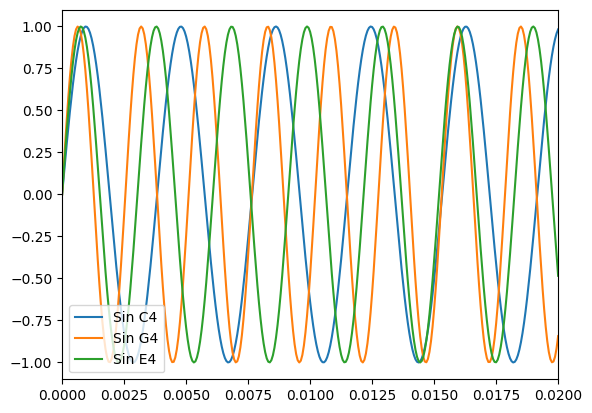

In [3]:
# Create three sine waves with numpy in jupyter notebook
# C4 = 261.63 hz
# G4 = 392.00 hz
# E4 = 329.63 hz

time = np.linspace(0,1, num=16000)
tone_C4 = np.sin(2 * np.pi * 261 * time )
tone_G4 = np.sin(2 * np.pi * 392 * time )
tone_E4 = np.sin(2 * np.pi * 329 * time )
print(len(tone_C4))


plt.plot(time, tone_C4, label = "Sin C4")
plt.plot(time, tone_G4 ,label = "Sin G4")
plt.plot(time, tone_E4, label ="Sin E4")
plt.legend(loc="lower left")
plt.xlim(0,0.02)


# add them together to create a beautiful C-ackord
C_accord = tone_C4 + tone_G4 + tone_E4

(0.0, 0.02)

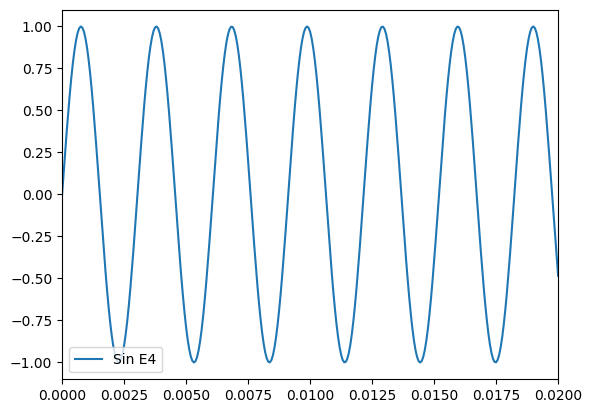

In [4]:
#  Draw a line graph to see the waveform
plt.plot(time, tone_E4, label ="Sin E4")
plt.legend(loc="lower left")
plt.xlim(0,0.02)

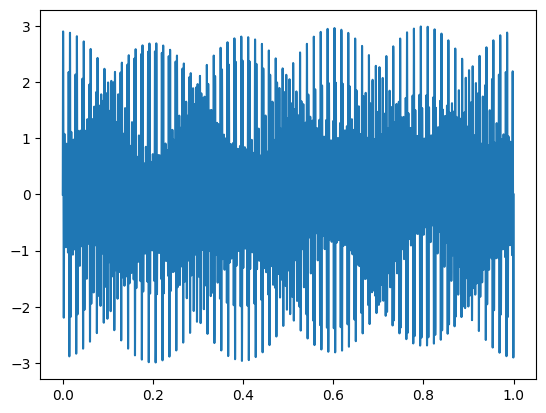

In [5]:
C_accord = tone_C4 + tone_G4 + tone_E4
plt.plot(time, C_accord )


# print a wav file using scipy 
from scipy.io.wavfile import write
write("C_accord.wav",16000 , C_accord)


# Export your two arrays as columns in a .csv file.
tone_C4.tofile("tone_C4.csv", sep=",")
C_accord.tofile("C_accord.csv", sep=",")

### Project 3 task 2 

In [6]:
import matplotlib.image as img


In [7]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

In [8]:
image = img.imread("./pokemon.png")

### creates the pokemon image into three luminance channels RGB

In [9]:
# inmInt= np.int_(image*255)
# creates the pokemon image into three different arrays 
# (the luminance channels R,G, &B)

imgL_Red  =image[:,:,0] # Red
imgM_Gre  =image[:,:,1] # Green
imgR_Blu  =image[:,:,2] # Blue
imgO_oth  =image[:,:,3] # Ohter

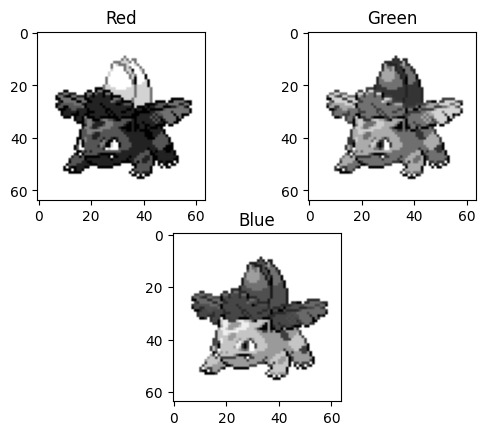

In [10]:
fig = plt.figure()
fig.add_subplot(2,2,1)
plt.title("Red")
plt.imshow(imgL_Red ,cmap="gray")

fig.add_subplot(2,2,2)
plt.title("Green")
plt.imshow(imgM_Gre ,cmap="gray")

fig.add_subplot(2,1,2)
plt.title("Blue")
plt.imshow(imgR_Blu ,cmap="gray")


### Making a new image from 3 Arrays 

Before Img: (64, 64, 4)
New Img: (64, 64, 3)


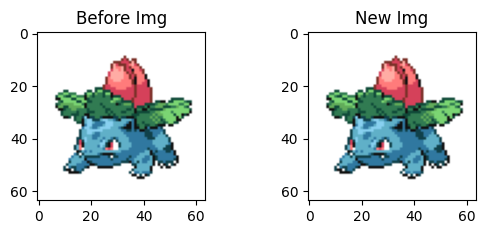

In [11]:

#   Making a new image from 3 Arrays
newImgWithRGB = np.dstack((imgL_Red,imgM_Gre,imgR_Blu))

#   Comparing the original image shape with the new one
print("Before Img:", image.shape)
print("New Img:", newImgWithRGB.shape)


fig = plt.figure()
fig.add_subplot(2,2,1)
plt.title("Before Img")
plt.imshow(image ,cmap="gray")

fig.add_subplot(2,2,2)
plt.title("New Img")
plt.imshow(newImgWithRGB ,cmap="gray")

#   Saving the new result from 3 arrays to a new RGB png image
import matplotlib.image
matplotlib.image.imsave('newImgWithRGB.png', newImgWithRGB)


Project 3 task 3 

### Secret information is used here and developed for the alpha channel

In [99]:
# here we use the secret information image
#  and fix it from the bug
#  so that it works on the alpha channel in fabio64.png

secret_info = img.imread("./secret_info.png")
secret_info_alfa= np.int_(secret_info[:,:,0]*255)
alfa_Img = np.where(secret_info_alfa < 1,  255 , secret_info_alfa)

### Before the image and the alpha channel

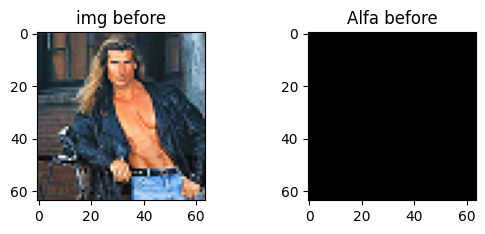

In [97]:
fabio64 = img.imread("./fabio64.png")
fig = plt.figure()
fig.add_subplot(2,2,1)
plt.title("img before")
plt.imshow(fabio64  )

fig.add_subplot(2,2,2)
plt.title("Alfa before")
plt.imshow(fabio64[:,:,3], cmap="gray" )

### After the image and the alpha channel

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


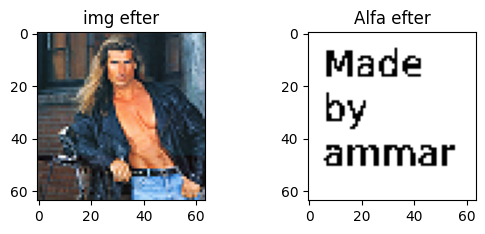

In [98]:
# here we replace the alpha channel with the secret information
hidden_MBA = img.imread("./fabio64.png")
hidden_MBA = np.dstack((hidden_MBA[:,:,0],hidden_MBA[:,:,1],hidden_MBA[:,:,2],alfa_Img))

fig = plt.figure()
fig.add_subplot(2,2,1)
plt.title("img efter")
plt.imshow(hidden_MBA  )

# here we showing the alpha channel with the new secret information layer
fig.add_subplot(2,2,2)
plt.title("Alfa efter")
plt.imshow(hidden_MBA[:,:,3], cmap="gray" )


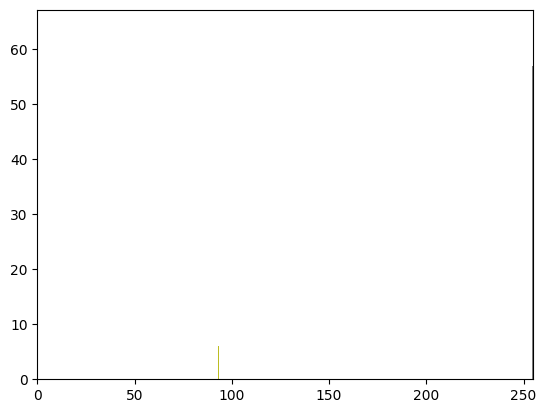

In [84]:
# Bonus points for the hidden data in a histogram
im = hidden_MBA[:,:,3] 
b, bins, patches = plt.hist(im, 255)
plt.xlim([0,255])
plt.show()